##Kyle Braman, Donovan Dutcher, Nathaniel Plummer, William Bange

In [ ]:
from wordcloud import STOPWORDS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The tidytext package isn't in Google Colaboratory's default list of packages, so we install it first
!pip install tidytext
import tidytext
# This library is used by tidytext for tokenization
import nltk
nltk.download('punkt')

import plotly.express as px

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3870 sha256=e403fe12ca2eeba85c689e5b89cf81c1ee49475ba5f552d74927970e9560d9f2
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## This is Just A Notebook With Some of My Work - Kyle
So we can all see what is being done

Edit as you want, but we should probably leave comments about who did what

In [ ]:
Corpus_Raw_1 = pd.read_csv("https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/GTC_Version1/genocide-transcript-corpus-v11.csv")

In [ ]:
Corpus_Raw_1.head() #Anything with the Tribunal tag = 1 is from the Cambodia Trials #

,Unnamed: 0,paragraph,label,tribunal,witness,document,case,date
0,1,June Before the Judges NIL Nonn Presiding Si...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
1,2,pag e Questioning by Mr Kar Savuth commenc es ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
2,3,decision on the removal of witnesses from the ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
3,4,The defence agreed with the Chambers proposal ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
4,5,therefore be in a position to compare them wit...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009


In [ ]:
Corpus_Raw_1.dtypes #Label 1 means violent content in a paragraph, 0 means no violent content#

Unnamed: 0     int64
paragraph     object
label          int64
tribunal       int64
witness       object
document      object
case          object
date          object
dtype: object

In [ ]:
Corpus_Raw_1['tribunal'].value_counts()

2    530
3    480
1    465
Name: tribunal, dtype: int64

## 1 is Cambodia,  2 is Yugoslavia, 3 is Rwanda

All will be useful for the tf_idf stuff we have to do

In [ ]:
Cambodia = Corpus_Raw_1.loc[Corpus_Raw_1['tribunal']==1] #Now this data only contains the Cambodia Tribunals

In [ ]:
CC = tidytext.unnest_tokens(Cambodia, 'word', 'paragraph') #Tokenizing the paragaph column contents into a word column

In [ ]:
CC.head()

,Unnamed: 0,label,tribunal,witness,document,case,date,word
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,june
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,before
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,the
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,judges
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,nil


In [ ]:
CC = CC[['witness', 'word']] #Keeping only these two columns#
CC.head()

,witness,word
0,Vann Nath,june
0,Vann Nath,before
0,Vann Nath,the
0,Vann Nath,judges
0,Vann Nath,nil


##The words below I manually searched for and removed. I assume that the errors happened when Khmer (the language of Cambodia) was translated into English. Not sure if there is a way to recover them? - Kyle

In [ ]:
my_stop = list(STOPWORDS)
my_stop.append('„')
my_stop.append('“')
my_stop.append('’')
my_stop.append('ðž')
my_stop.append('ð¹å¬')
my_stop.append('ðµä•ð')
my_stop.append('ðµä')
my_stop.append('ð')
my_stop.append('î')
my_stop.append('ëå†ä¯')
my_stop.append('ë')
my_stop.append('å†ä¯')
my_stop.append('åÿ')
my_stop.append('å¬')
my_stop.append('åªë')
my_stop.append('åªå†ð¹â…œåµå™ðµä')
my_stop.append('åªä®ð¹å†î‰ëâ')
my_stop.append('åªä®ð¹')
my_stop.append('åªä®')
my_stop.append('ää³ðš')
my_stop.append('äâ‚§åÿ	')
my_stop.append('äâ‚§')
my_stop.append('ä')
my_stop.append('ã‰lisabeth	')
my_stop.append('â€')
my_stop.append('äâ‚§åÿ')
my_stop.append('ã‰lisabeth')
my_stop.append('â…œâ‚¤äœ')
my_stop.append('â‚£ã°ä')
my_stop.append('â‚£')
my_stop.append('®åªä³')
my_stop.append('c')
my_stop.append('kw')

In [ ]:
CC_Clean = CC.loc[~CC['word'].isin(my_stop)]
CC_Count = CC_Clean.groupby('witness')['word'].value_counts(normalize=True)
CC_Count

witness      word      
2-TCCP-1063  transcript    0.014884
             language      0.014493
             corrected     0.014101
             chamber       0.012665
             mr            0.011620
                             ...   
Vann Nath    yung          0.000091
             zachery       0.000091
             zero          0.000091
             zinc          0.000091
             zoran         0.000091
Name: word, Length: 10640, dtype: float64

In [ ]:
CC_Count = CC_Count[CC_Count > 0.000091] #0.000091 is the lowest frequency, so I'm only keeping things above that value#

In [ ]:
CC_Count.name = 'text_freq'
CC_Count = CC_Count.reset_index()
CC_Count.head()

,witness,word,text_freq
0,2-TCCP-1063,transcript,0.014884
1,2-TCCP-1063,language,0.014493
2,2-TCCP-1063,corrected,0.014101
3,2-TCCP-1063,chamber,0.012665
4,2-TCCP-1063,mr,0.011620


In [ ]:
CC_Count = CC_Count.pivot(index = 'word', columns = 'witness', values = 'text_freq')

##I pivoted the frame on the Witness names, so we can see a cross-section of each word and whether it was used by each witness. -Kyle

In [ ]:
CC_Count.head()

witness,2-TCCP-1063,Bay Sophany,Chum Mey,Seng Sivutha,Seoun Sovandy,Sin Oeng,Vann Nath
word,,,,,,,
abandoned,NaN,NaN,NaN,0.000648,NaN,NaN,NaN
ability,NaN,0.000167,NaN,0.000324,NaN,NaN,0.000091
able,NaN,0.000335,0.000922,0.000648,0.000434,0.000406,0.000729
aboard,0.000131,NaN,NaN,NaN,NaN,NaN,NaN
absence,NaN,NaN,NaN,NaN,NaN,NaN,0.000091


In [ ]:
print(CC_Count.columns) #This was to get the column names for the next part. Typing them as strings didn't seem to work. Maybe spaces that I don't see?#

Index(['2-TCCP-1063', 'Bay Sophany', 'Chum Mey', 'Seng Sivutha',
       'Seoun Sovandy', 'Sin Oeng', 'Vann Nath'],
      dtype='object', name='witness')


In [ ]:
CC_Count.loc[CC_Count['2-TCCP-1063'].isna(), '2-TCCP-1063'] = CC_Count['2-TCCP-1063'].min()/2
CC_Count.loc[CC_Count['Bay Sophany'].isna(), 'Bay Sophany'] = CC_Count['Bay Sophany'].min()/2
CC_Count.loc[CC_Count['Chum Mey'].isna(), 'Chum Mey'] = CC_Count['Chum Mey'].min()/2
CC_Count.loc[CC_Count['Seng Sivutha'].isna(), 'Seng Sivutha'] = CC_Count['Seng Sivutha'].min()/2
CC_Count.loc[CC_Count['Seoun Sovandy'].isna(), 'Seoun Sovandy'] = CC_Count['Seoun Sovandy'].min()/2
CC_Count.loc[CC_Count['Sin Oeng'].isna(), 'Sin Oeng'] = CC_Count['Sin Oeng'].min()/2
CC_Count.loc[CC_Count['Vann Nath'].isna(), 'Vann Nath'] = CC_Count['Vann Nath'].min()/2

##Removing all of the NaN values and replacing them with half the lowest tf value for each witness. -Kyle

In [ ]:
CC_Count.head()

witness,2-TCCP-1063,Bay Sophany,Chum Mey,Seng Sivutha,Seoun Sovandy,Sin Oeng,Vann Nath
word,,,,,,,
abandoned,0.000065,0.000084,0.000051,0.000648,0.000108,0.000068,0.000046
ability,0.000065,0.000167,0.000051,0.000324,0.000108,0.000068,0.000091
able,0.000065,0.000335,0.000922,0.000648,0.000434,0.000406,0.000729
aboard,0.000131,0.000084,0.000051,0.000162,0.000108,0.000068,0.000046
absence,0.000065,0.000084,0.000051,0.000162,0.000108,0.000068,0.000091


In [ ]:
Cambodia['witness'].value_counts() #Getting a count of how many entries each witness has#

Vann Nath        114
Chum Mey         100
2-TCCP-1063       66
Sin Oeng          62
Bay Sophany       52
Seoun Sovandy     42
Seng Sivutha      29
Name: witness, dtype: int64

##Splitting each witness into their own dataframe. Not as useful as some of the other stuff we can do, but we hadn't learned tf_idf yet. -Kyle

In [ ]:
VannNath = Cambodia.loc[Cambodia['witness']=='Vann Nath']
ChumMey = Cambodia.loc[Cambodia['witness']=='Chum Mey']
UnNamed = Cambodia.loc[Cambodia['witness']=='2-TCCP-1063']
SinOeng = Cambodia.loc[Cambodia['witness']=='Sin Oeng']
BaySoph = Cambodia.loc[Cambodia['witness']=='Bay Sophany']
SeounSov = Cambodia.loc[Cambodia['witness']=='Seoun Sovandy']
SengSiv = Cambodia.loc[Cambodia['witness']=='Seng Sivutha']

In [ ]:
Van = tidytext.unnest_tokens(VannNath, 'word', 'paragraph')
Van.head()

,Unnamed: 0,label,tribunal,witness,document,case,date,word
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,june
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,before
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,the
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,judges
0,1,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,nil


In [ ]:
Van = Van[['label', 'word']] #I'm going to sort and analyze by label, so we can see word frequency of violent vs nonviolent paragraphs

In [ ]:
Van['word'].value_counts()

the           1644
and            813
to             776
i              704
that           592
              ... 
necks            1
boeng            1
hammock          1
chamkardon       1
h                1
Name: word, Length: 2401, dtype: int64

In [ ]:
VanClean = Van.loc[~Van['word'].isin(my_stop)]
VanCount = VanClean.groupby('label')['word'].value_counts(normalize=True)

In [ ]:
VanCount = VanCount[VanCount > 0.000205] #Sorting out and removing the lowest frequency words again#

In [ ]:
VanCount.name = 'text_freq'
VanCount = VanCount.reset_index()

In [ ]:
VanCount.head()

,label,word,text_freq
0,0,mr,0.019882
1,0,q,0.015774
2,0,chamber,0.011830
3,0,president,0.011666
4,0,time,0.011173


In [ ]:
VanCount = VanCount.pivot(index = 'word', columns = 'label', values = 'text_freq') #Only execute this line once or you have to go back from line 73!!!#
VanCount = VanCount.reset_index()

In [ ]:
print(VanCount.columns)

Index(['word', 0, 1], dtype='object', name='label')


##The column names threw me for a minute. I ended up having to just use a number? Not fully sure why it let me do that. Something I need to ask about for sure. -Kyle

In [ ]:
VanCount.loc[VanCount[0].isna(), 0] = VanCount[0].min()/2
VanCount.loc[VanCount[1].isna(), 1] = VanCount[1].min()/2

In [ ]:
VanCount.head()

label,word,0,1
0,able,0.000657,0.000818
1,accept,0.000329,0.000205
2,accommodation,0.000329,0.000205
3,accomplish,0.000164,0.000614
4,accused,0.004108,0.000614


In [ ]:
VanCount['ratio'] = VanCount[0]/VanCount[1]
VanCount['log_ratio'] = np.log10(VanCount['ratio'])

# This should compare the words that are most common to each violent or nonviolent paragraph I think #
# Should give an indication of words associated with violence, maybe something interesting will show up? #

In [ ]:
VanCount.head()

label,word,0,1,ratio,log_ratio
0,able,0.000657,0.000818,0.802990,-0.095290
1,accept,0.000329,0.000205,1.605981,0.205740
2,accommodation,0.000329,0.000205,1.605981,0.205740
3,accomplish,0.000164,0.000614,0.267663,-0.572411
4,accused,0.004108,0.000614,6.691587,0.825529


In [ ]:
VanCount = VanCount.sort_values('log_ratio', ascending=True)

In [ ]:
VanCount.head()

label,word,0,1,ratio,log_ratio
1099,water,0.000164,0.004297,0.038238,-1.417509
1035,tortured,0.000164,0.004297,0.038238,-1.417509
492,interrogated,0.000164,0.003888,0.042263,-1.374043
246,dead,0.000164,0.002865,0.057356,-1.241418
1023,tied,0.000164,0.002046,0.080299,-1.095290


In [ ]:
VanCount.nsmallest(30, 'log_ratio')
#This is a super-useful function with regards to the log ratio!!! #Probably similar to value counts though#
#keep = 'last' will resolve ties somehow, (doesn't work well for this) #
#keep = 'all' will include more than n entries if there are ties #

label,word,0,1,ratio,log_ratio
1099,water,0.000164,0.004297,0.038238,-1.417509
1035,tortured,0.000164,0.004297,0.038238,-1.417509
492,interrogated,0.000164,0.003888,0.042263,-1.374043
246,dead,0.000164,0.002865,0.057356,-1.241418
1023,tied,0.000164,0.002046,0.080299,-1.095290
911,shackle,0.000164,0.001842,0.089221,-1.049532
110,bodies,0.000164,0.001842,0.089221,-1.049532
76,based,0.000164,0.001637,0.100374,-0.998380
825,regulations,0.000164,0.001637,0.100374,-0.998380
144,cells,0.000164,0.001637,0.100374,-0.998380


**Choeung Ek (label 165)** is the name of a mass grave site, the most famous of the killing fields of the Khmer Rouge**

**Bou Meng (label 604)** is the name of one of 7 known adult survivors of S-21 Tuol Sleng camp.


In [ ]:
VanCountFilter = VanCount[~((VanCount['log_ratio']<= 0.73) & (VanCount['log_ratio']>=-0.73))]
VanCountFilter.head(3)# This DataFrame contains only the most polarized words #

label,word,0,1,ratio,log_ratio
1099,water,0.000164,0.004297,0.038238,-1.417509
1035,tortured,0.000164,0.004297,0.038238,-1.417509
492,interrogated,0.000164,0.003888,0.042263,-1.374043


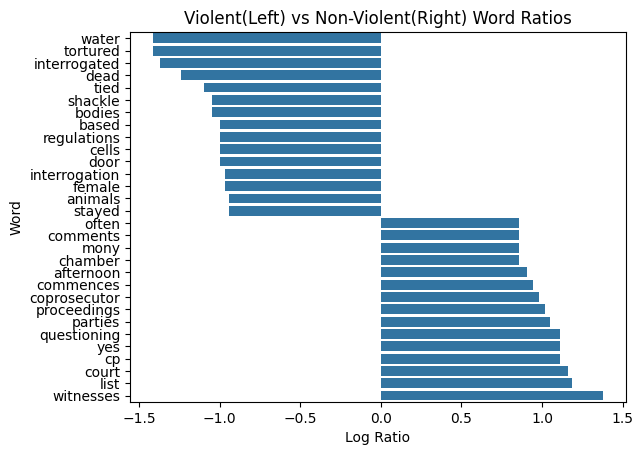

In [ ]:
FirstLastVan = pd.concat([VanCountFilter[0:15], VanCountFilter[-15:]]) #Mess around with these limits some more!!!#

sns.barplot(data = FirstLastVan, x = 'log_ratio', y = 'word')
plt.title('Violent(Left) vs Non-Violent(Right) Word Ratios')
plt.xlabel('Log Ratio')
plt.ylabel('Word')
plt.show()

# Words Spiking to the right show up more often in non-violent paragraphs #
# Words spiking to the left show up more often in paragraphs containing violence #
# Check to make sure this is how it is working #

**I did it with Plotly below. Definitely looks nicer, and there is apparently a way to save these figures and maintain them as interactive. Haven't figured that out yet.** -Kyle

**Definitely also stuff that can and should be done with the colors if we present with this.**

In [ ]:
VanPolarized = px.histogram(VanCountFilter, x = 'log_ratio', y = 'word', labels = {'word':'Word'}) # Made using the most polarized words #
VanPolarized.update_layout(title = {'text':'Violent(Left) vs Nonviolent(Right) Words [Range restricted to ± 0.73]', 'y':0.97, 'x':0.5, 'xanchor':'center'})

VanPolarized.show()